<a href="https://colab.research.google.com/github/Masoud0389/Delay-Attack-Detection/blob/main/Delay_Detection_Supervised_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!pwd

In [4]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_Delay2.csv')

In [5]:
X = dataset.iloc[:, :]
y = np.arange(0, 600019)
y = y*0
for i in range(0, 20):
  y[17500+ 30000*i:20000+ 30000*i] = 1
y = pd.DataFrame(y)
#X['l'] = y
#y = dataset.iloc[:, -1]

In [6]:
#print(X, y)

# Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [8]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#scaler = RobustScaler()
#X_scaled = scaler.fit_transform(X)
#maxabs_scaler = MaxAbsScaler()
#X_scaled = maxabs_scaler.fit_transform(X)
#min_max_scaler = preprocessing.MinMaxScaler()
#X_scaled = min_max_scaler.fit_transform(X) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_train_normalized = normalize(X_train_scaled, norm = 'max')
X_test_normalized = normalize(X_test_scaled, norm = 'max')
# Converting the numpy array into a pandas DataFrame
X_train_normalized = pd.DataFrame(X_train_normalized)
X_test_normalized = pd.DataFrame(X_test_normalized)

# Feature Selection/Reduction

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, whiten= True)
X_train_principal = pca.fit_transform(X_train_normalized)
X_train_principal = pd.DataFrame(X_train_principal)
X_test_principal = pca.fit_transform(X_test_normalized)
X_test_principal = pd.DataFrame(X_test_principal)

# Plot Test

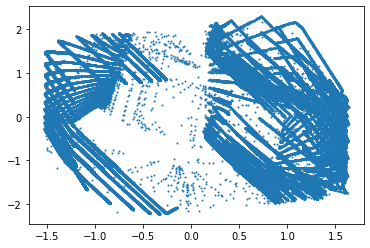

In [11]:
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1], s = 1 , alpha=1)

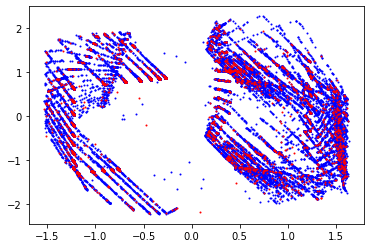

In [13]:
plt.scatter(X_train_principal.iloc[:17500,0], X_train_principal.iloc[:17500,1], c = 'b', s = 1 , alpha=1)
plt.scatter(X_train_principal.iloc[20000:30000,0], X_train_principal.iloc[20000:30000,1],c = 'b', s = 1 , alpha=1)
plt.scatter(X_train_principal.iloc[17500:20000,0], X_train_principal.iloc[17500:20000,1], c = 'r', s = 1 , alpha=1)
plt.show()

In [ ]:

#print(X_principal.iloc[:,0])
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1],c = 'b', s = 1 , alpha=1)
for i in range(0, 20):
  plt.scatter(X_train_principal.iloc[17500 + 30000*i:20000+ 30000*i,0], X_train_principal.iloc[17500+ 30000*i:20000+ 30000*i,1],c = 'r', s = 1 , alpha=1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
plt.show()

# Anomaly Detection

In [ ]:
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train_principal, y_train)

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_principal, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#from sklearn.cluster import DBSCAN
# Numpy array of all the cluster labels assigned to each data point
#db_default = DBSCAN(eps = 0.1, min_samples = 1000000).fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')

In [ ]:
#from sklearn.ensemble import IsolationForest
#label = IsolationForest(n_estimators= 50, contamination=0.13, max_samples=5000).fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 10000).fit_predict(X_principal)

In [ ]:
#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=1000)
#label = lof.fit_predict(X_principal)
#label = lof.fit(X_principal)

In [ ]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)

In [ ]:
#print(label)
#label = pd.DataFrame(label, columns = ['Column_A'])
#label.to_csv("lof_test1.csv")

# Results

In [20]:
y_pred = classifier.predict(X_test_principal)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[94010 15937]
 [ 5223  4834]]


0.8236725442485251

# Visualization

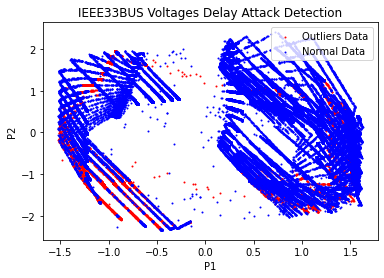

In [19]:
plt.scatter(X_test_principal.loc[y_pred == 1, 0], X_test_principal.loc[y_pred == 1, 1], s = 1, c = 'red', label = 'Outliers Data')
plt.scatter(X_test_principal.loc[y_pred == 0, 0], X_test_principal.loc[y_pred == 0, 1], s = 1, c = 'blue', label = 'Normal Data')
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show() 

In [ ]:
#index = np.where(label == -1)
#index1 = np.where(label==1)
#index = tuple((i+100000)/20000 for i in index)
#index1 = tuple((i+100000)/20000 for i in index1)

In [ ]:
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(index1, X_principal.loc[label == 1, 1], s = 1, c = 'blue', label = 'Normal Data')
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
#plt.title('IEEE33BUS Voltages Delay Attack Detection')
#plt.xlabel('Time')
#plt.ylabel('V')
#plt.legend()
#plt.show() 

In [ ]:
#ind = pd.Series(range(1,500001))
#ind = (ind/20000)+5
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')

In [ ]:
#plt.scatter(ind[200000:260001], X_principal.loc[200000:260000,1], s = 1 )